# Previsão de Insuficiência Cardíaca

### Etapa 1: Entendimento do problema

#### Introdução  
A previsão de insuficiência cardíaca é um processo que visa identificar indivíduos em risco de desenvolver essa condição, usando dados clínicos e técnicas de aprendizado de máquina. A insuficiência cardíaca ocorre quando o coração não consegue bombear sangue de maneira eficiente, muitas vezes devido a doenças cardiovasculares subjacentes.  

As doenças cardiovasculares são a principal causa de mortalidade no mundo, responsáveis por aproximadamente 17,9 milhões de óbitos anuais, o que representa 31% de todas as mortes globalmente. Quatro em cada cinco fatalidades por DCV são decorrentes de infartos e acidentes vasculares cerebrais, e um terço desses casos ocorre de forma prematura em pessoas com menos de 70 anos. A insuficiência cardíaca é um evento frequente associado a essas condições, e este conjunto de dados inclui 11 atributos que podem ser utilizados para prever a possibilidade de uma doença cardíaca.

Indivíduos com condições do sistema circulatório ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doenças já diagnosticadas) necessitam de detecção e manejo precoces, onde um modelo de aprendizado de máquina pode ser de grande auxílio.  

<br>

#### Objetivo  
* Identificar os parâmetros mais importantes no conjunto de dados para classificar com precisão os casos de insuficiência cardíaca.
* Treinar um algoritmo de aprendizado de máquina para reconhecer e classificar os casos de insuficiência cardíaca com precisão.  

<br>

#### Base de Dados - Atributos

* **Age**:&nbsp; Idade do paciente  *\[anos]*  
* **Sex**:&nbsp; Sexo do paciente *\[0: Feminino, 1: Masculino]*    
* **ChestPainType (cp)**:&nbsp; Tipo de dor no peito *\[TA(0): Angina Típica,&nbsp; ATA(1): Angina Atípica,&nbsp; NAP(2): Dor Não Anginosa, &nbsp;ASY(3): Assintomático]*  
* **RestingBP (trestbps)**:&nbsp; Pressão arterial em repouso *\[mm Hg]*    
* **Cholesterol (chol)**:&nbsp; Colesterol sérico *\[mm/dl]*    
* **FastingBS (fbs)**:&nbsp; Glicemia de jejum *\[(0)Normal,&nbsp; Glicemia em jejum > 120 mg/dl]*    
* **RestingECG (restecg)**:&nbsp; Resultado do eletrocardiograma em repouso *\[Normal(0): normal,&nbsp; ST(1): anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV),&nbsp; LVH(2): mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]*  
* **MaxHR (thalach)**:&nbsp; Frequência cardíaca máxima atingida *\[Valor numérico entre 60 e 202]*     
* **ExerciseAngina (exang)**:&nbsp; Angina induzida por exercício *\[0: Sim, 1: Não]*   
* **Oldpeak**:&nbsp; Depressão do segmento ST induzida por exercício em relação ao repouso *\[Valor numérico medido em depressão]*
* **ST_Slope (slope)**:&nbsp; Inclinação do segmento ST no pico do exercício *\[(0) ascendente,&nbsp; (1)plano,&nbsp; (2)descendente]*    
* **ca**:&nbsp; Número de vasos principais (0-3) evidenciados por fluoroscopia    
* **thal**:&nbsp; Defeitos relacionados à talassemia *\[(3)normal,&nbsp; (6)defeito fixo,&nbsp; (7)defeito reversível]*  
* **HeartDisease**:&nbsp; output class [1:heart disease,&nbsp; 0:Normal]    

<br>

---

### Etapa 2: Entendimento dos dados


#### Instalar pacotes

In [3]:
!pip install joblib
!pip install lazypredict

#### Carregar bibliotecas

In [28]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import skew, kurtosis
import math

# Biblioteca Google Colab
from google.colab import drive

# Biblioteca para salvar modelo
import joblib

# Biblioteca para Utilizar Otimização Bayesiana na Otimização de Hiperparâmetros
# from skopt import BayesSearchCV

# Biblioteca para análise dos melhores modelos
from lazypredict.Supervised import LazyClassifier

# Scikit Learn
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report


<br>

#### Funções necessárias

In [44]:
def grava_log_train(arquivo):

  import os
  from datetime import datetime

  # Define o caminho do arquivo de log
  log_file = arquivo

  # Verifica se o arquivo existe
  if not os.path.exists(log_file):
    # Cria o arquivo se não existir
    open(log_file, 'w').close()

  # Obtém a data e hora atuais
  current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

  # Após a execução do grid_search
  # Pressupondo que o grid_search já foi executado
  best_params = model.best_params_
  best_score = model.best_score_

  # Registra a data/hora, os melhores parâmetros e a melhor pontuação
  with open(log_file, 'a') as f:
    f.write(f"Data/Hora: {current_time}\n")
    f.write(f"Melhores Parâmetros: {best_params}\n")
    f.write(f"Melhor Pontuação: {best_score:.8f}\n")
    f.write("="*40 + "\n")  # Divisor para legibilidade

<br>

### Carregar base de dados

#### Mapear Google Drive

In [5]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Projetos/Heart_failure_prediction/data/raw/heart.csv'

Mounted at /content/drive


#### Criar dataframes

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


#### Renomear colunas

In [8]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  label     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Verificação de atributos faltantes  

In [10]:
mv = df.isnull().any().sum()
print('Número de observações em branco:', mv)

Número de observações em branco: 0


**Análise**  

* 14 atributos    
* 303 observações  
* Variável resposta: *output*  
* Não há observações em branco  
* Trata-se de um problema de classificação binária onde a variável resposta deve informar se um paciente possui risco alto ou baixo de apresentar um infarto do miocárdio.

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


---

<br>

### Análise Exploratória de Dados  

#### Análise numérica

In [12]:
var_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
var_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'tal']
label = ['label']

In [13]:
results = pd.DataFrame({
    'Assimetria': df[var_numericas].apply(skew),
    'Curtose': df[var_numericas].apply(kurtosis),
    'Média': df[var_numericas].mean(),
    'Mediana': df[var_numericas].median(),
    'Variância': df[var_numericas].var(),
    'Desvio Padrão': df[var_numericas].std(),
    'Mínimo': df[var_numericas].min(),
    'Máximo': df[var_numericas].max()
})

results

,Assimetria,Curtose,Média,Mediana,Variância,Desvio Padrão,Mínimo,Máximo
age,-0.20,-0.55,54.37,55.00,82.48,9.08,29.00,77.00
trestbps,0.71,0.89,131.62,130.00,307.59,17.54,94.00,200.00
chol,1.14,4.41,246.26,240.00,2686.43,51.83,126.00,564.00
thalach,-0.53,-0.08,149.65,153.00,524.65,22.91,71.00,202.00
oldpeak,1.26,1.53,1.04,0.80,1.35,1.16,0.00,6.20


#### Análise Gráfica Univariada

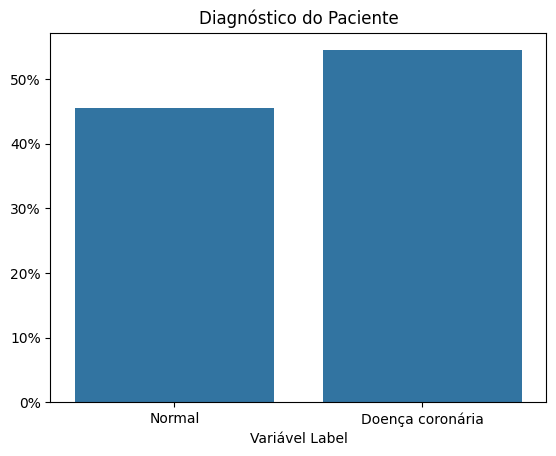

In [14]:
# Gráfico de barras
ax = sns.countplot(x=df['label'], stat='probability')

plt.title('Diagnóstico do Paciente')
ax.set_xlabel('Variável Label')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Normal', 'Doença coronária']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()

45% das pessoas não apresentavam insufuciência cardíaca, porém 55% apresentavam.  

<br>

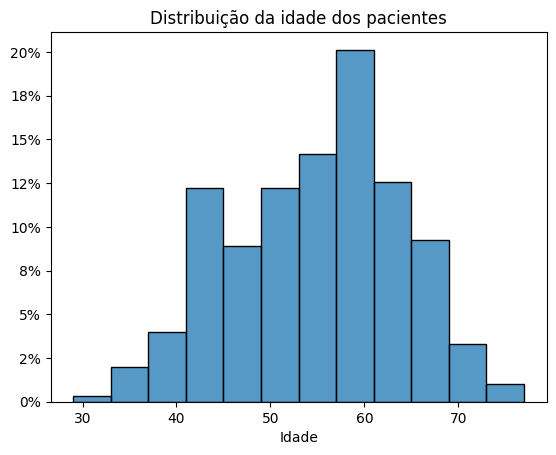

In [15]:
ax = sns.histplot(df['age'], stat='probability')
plt.title('Distribuição da idade dos pacientes')
ax.set_xlabel('Idade')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

A média de idade da população analisada é de 54 anos, tendo o mais novo 29 anos e o mais velho 77.   

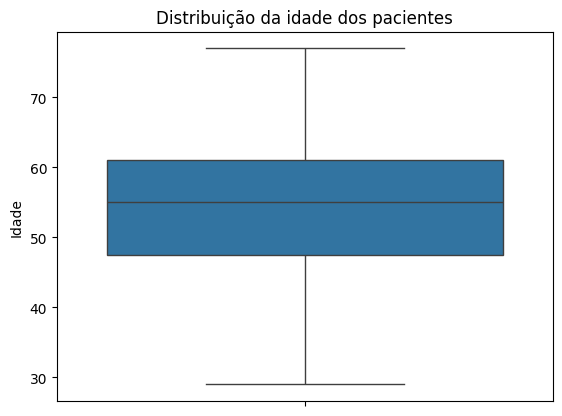

In [16]:
ax = sns.boxplot(df['age'])
plt.title('Distribuição da idade dos pacientes')
ax.set_ylabel('Idade')
plt.show()

Análise:  
* 25% da população estudada tem entre 27 e 48 anos.  
* 50% tem entre 48 e 61 anos.  
* 25% tem entre 61 e 77 anos.  

<br>

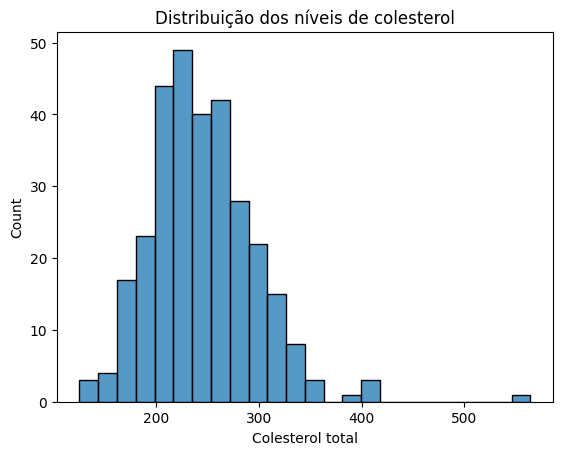

In [17]:
ax = sns.histplot(df['chol'])
plt.title('Distribuição dos níveis de colesterol')
ax.set_xlabel('Colesterol total')
plt.show()

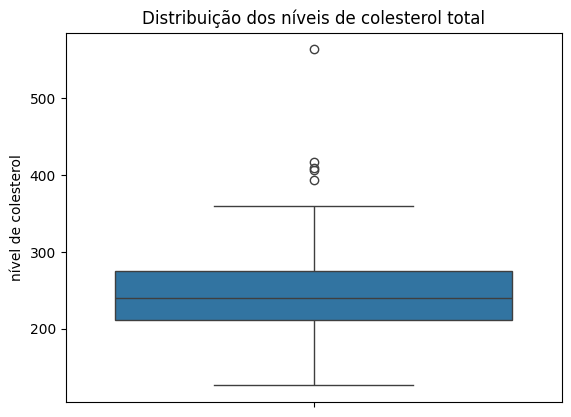

In [ ]:
ax = sns.boxplot(df['chol'])
plt.title('Distribuição dos níveis de colesterol total')
ax.set_ylabel('nível de colesterol')
plt.show()

OBSERVAÇÃO:  
Os níveis saudáveis de colesterol total geralmente são classificados da seguinte forma:  

* Colesterol Total Desejável (Saudável): Menos de 200 mg/dL (miligramas por decilitro)  
* Colesterol Total Limítrofe Alto: 200–239 mg/dL  
* Colesterol Total Alto: 240 mg/dL ou mais  

<br>

Análise:  
Na população estudada, apenas 25% dos pacientes possuem nível de colesterol total considerado normal (<200 mg/dL), ou seja, 75% das pessoas apresentam níveis elevados de colesterol.    

<br>

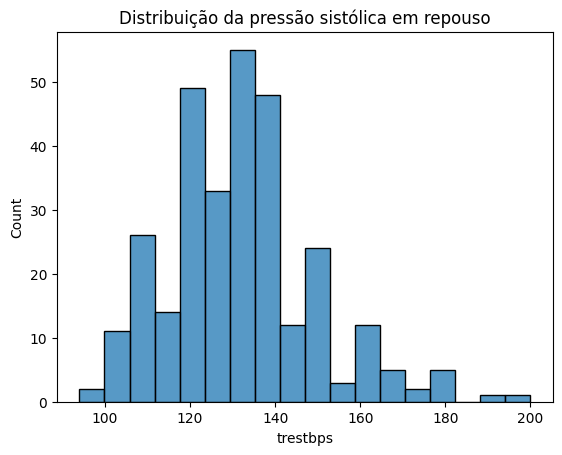

In [ ]:
sns.histplot(df['trestbps'])
plt.title('Distribuição da pressão sistólica em repouso')
plt.show()

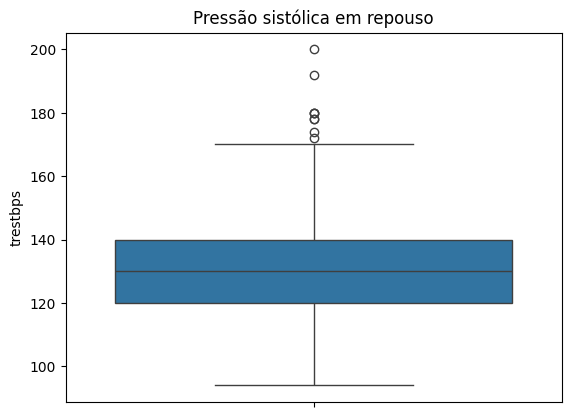

In [ ]:
sns.boxplot(df['trestbps'])
plt.title('Pressão sistólica em repouso')
plt.show()

Análise:  
Apenas 25% dos pacientes estudados possuem pressão sistólica considerada normal (abaixo de 120 mmHg), ou seja, 75% apresentam níveis elevados de pressão sistólica.  

<br>

In [ ]:
# Verifica paciente com pressão sistólica acima de 170 mmHg
df[df['trestbps'] > 170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.20,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.00,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.60,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.00,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.00,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.00,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.00,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.40,1,0,2,0


Análise:  
Nove pacientes apresentaram pressão sistólica em repouso acima 170 mmHg.  

<br>

In [18]:
# Cria df com M e F no lugar de 0 e 1
sexo = df['sex'].copy()
sexo = sexo.replace({0: 'F', 1: 'M'})

In [19]:
# Distribuição de frequências
sexo.value_counts()

,count
sex,
M,207
F,96


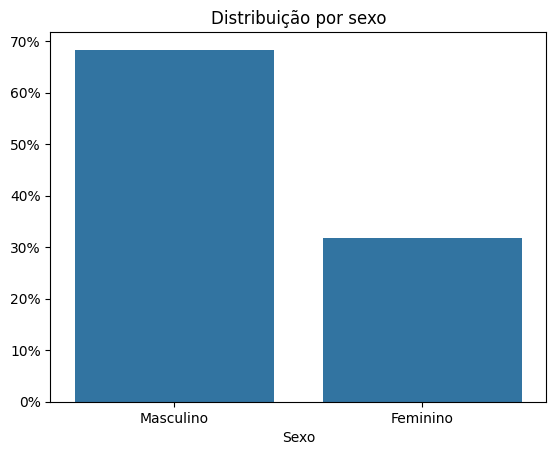

In [ ]:
# Gráfico de barras
ax = sns.countplot(x=sexo, stat='probability')

plt.title('Distribuição por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Masculino', 'Feminino']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Plotar o gráfico
plt.show()

Análise:  
Na população estudada, aproximadamente 70% são homens e 30% mulheres.  

<br>

##### Análise de Outliers

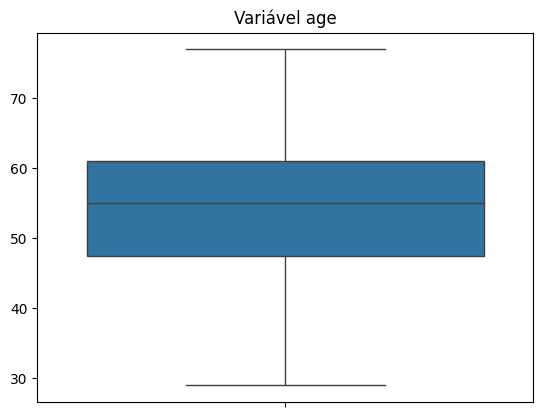

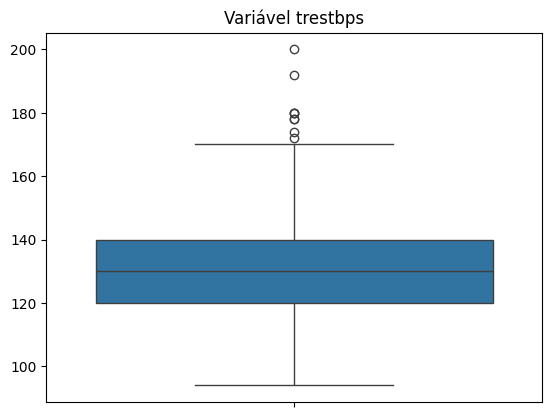

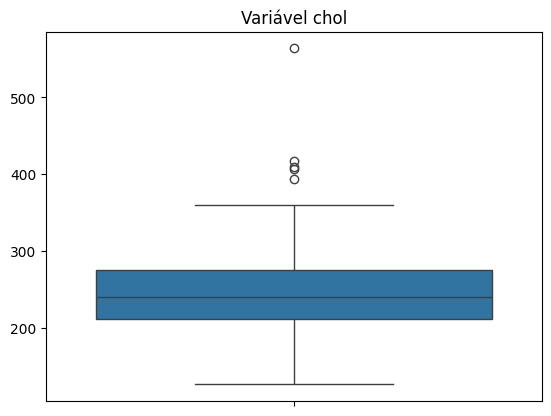

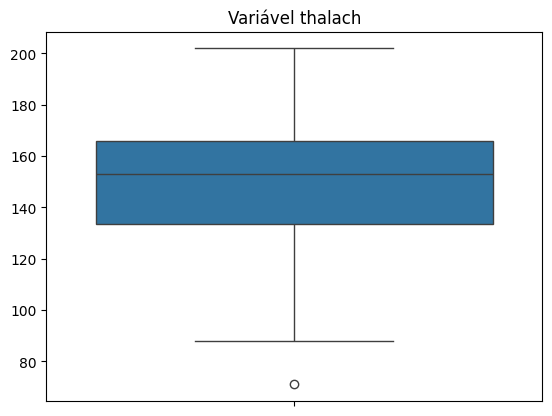

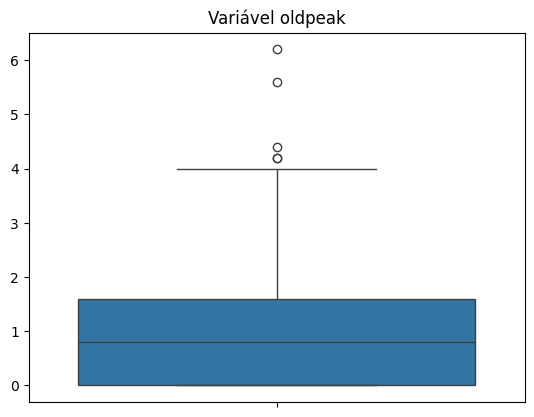

In [ ]:
var_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for coluna in var_numericas:
  sns.boxplot(df[coluna].values)
  plt.title('Variável ' + coluna)
  plt.show()


Análise:  

O estudo das variáveil pressão arterial sistólica em respouso *(trstbps)*, colesterol sérico *(chol)*, frequência cardíaca máxima atingida *(thalach)* e depressão do segmento ST induzida por exercício em relação ao repouso *(oldpeak)* mostraram a presença de valores que podem ser considerados outliers, porém do ponto de vista clínico, é possível que um indivíduo apresente tais indicadores, sendo assim, decidiu-se pela manutenção destas observações no modelo.  



---

<br>

#### Análise Gráfica Bivariada

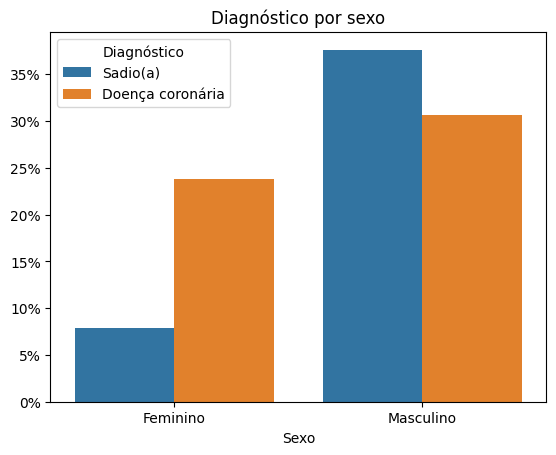

In [ ]:
# Gráfico de barras
ax = sns.countplot(data=df,x='sex', hue = "label", stat='probability')

plt.title('Diagnóstico por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Feminino', 'Masculino']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Customizar o título da legenda do hue
new_hue_labels = ['Sadio(a)', 'Doença coronária']
ax.legend(title='Diagnóstico', labels=new_hue_labels)
# Plotar o gráfico
plt.show()

Análise:  
De toda a população analisada 8% eram mulheres que não apresentavam insuficiência cardíaca e quase 25% eram mulheres que apresentavam a patologia. Por outro lado, em torno de 37% eram homens sem insuficiência cardíaca e 30% apresentavam a patologia.  

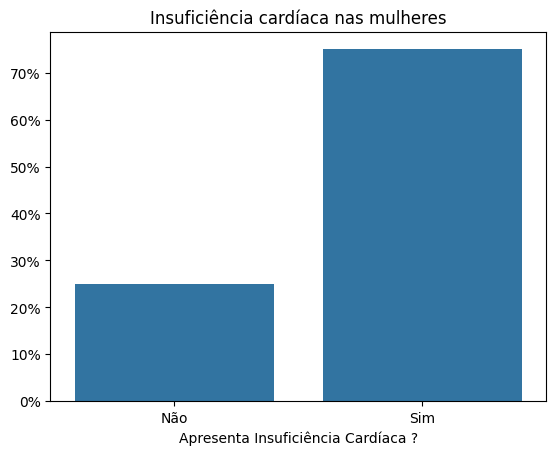

In [23]:
df_mulheres = df[df['sex'] == 0]

# Gráfico de barras
ax = sns.countplot(x=df_mulheres['label'], stat='probability')

plt.title('Insuficiência cardíaca nas mulheres')
ax.set_xlabel('Apresenta Insuficiência Cardíaca ?')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Não', 'Sim']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Plotar o gráfico
plt.show()

Análise:  
Na população analisada, 70% eram homens e 30% mulheres, porém mais de 70% das mulheres apresentavam insufuciência cardíaca.  Já nos homens, embora fossem mais numerosos no estudo, apenas 45% apresentavam insuficiência cardíaca.  

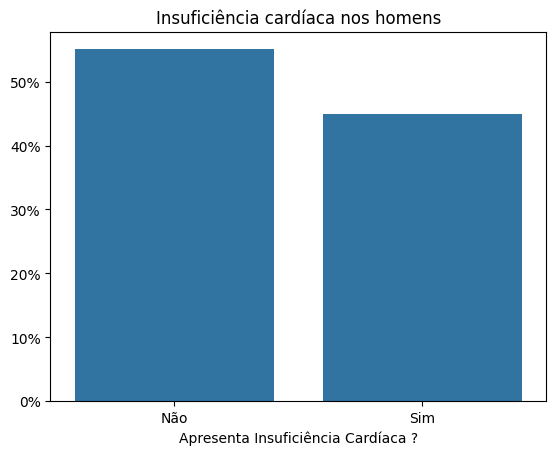

In [24]:
df_homens = df[df['sex'] == 1]

# Gráfico de barras
ax = sns.countplot(x=df_homens['label'], stat='probability')

plt.title('Insuficiência cardíaca nos homens')
ax.set_xlabel('Apresenta Insuficiência Cardíaca ?')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Não', 'Sim']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Plotar o gráfico
plt.show()

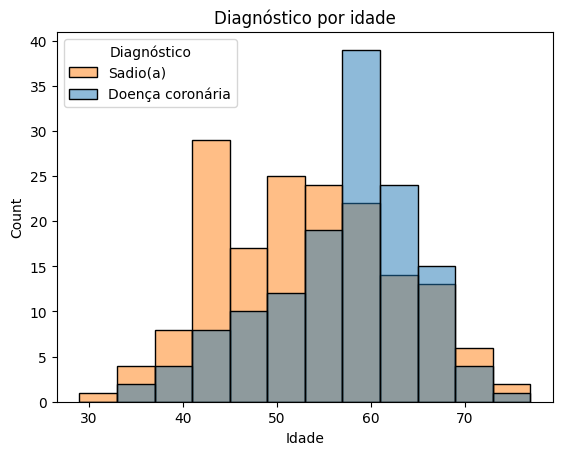

In [26]:
# Gráfico de barras
ax = sns.histplot(data=df,x='age', hue = "label")

# Adicionar título ao gráfico
plt.title('Diagnóstico por idade')
# Customizar o título do eixo x
ax.set_xlabel('Idade')
# Customizar o título da legenda do hue
new_hue_labels = ['Sadio(a)', 'Doença coronária']
ax.legend(title='Diagnóstico', labels=new_hue_labels)
# Plotar o gráfico
plt.show()

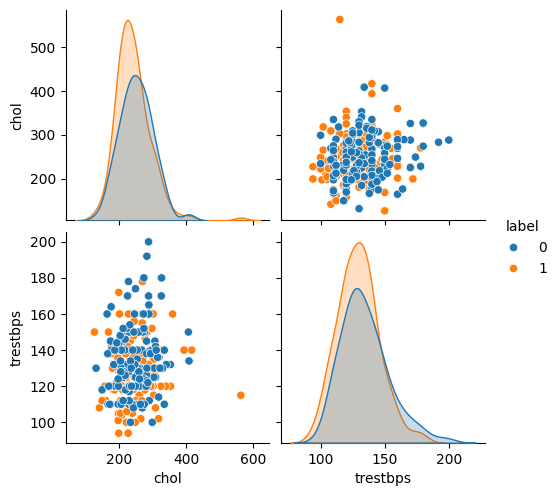

In [ ]:
ax = sns.pairplot(df[['chol', 'trestbps', 'label']], hue="label")
# Adicionar título ao gráfico
plt.title('Diagnóstico por idade')
# Customizar o título da legenda do hue
new_hue_labels = ['Sadio(a)', 'Doença coronária']
#t.legend(title='Diagnóstico', labels=new_hue_labels)
plt.show()

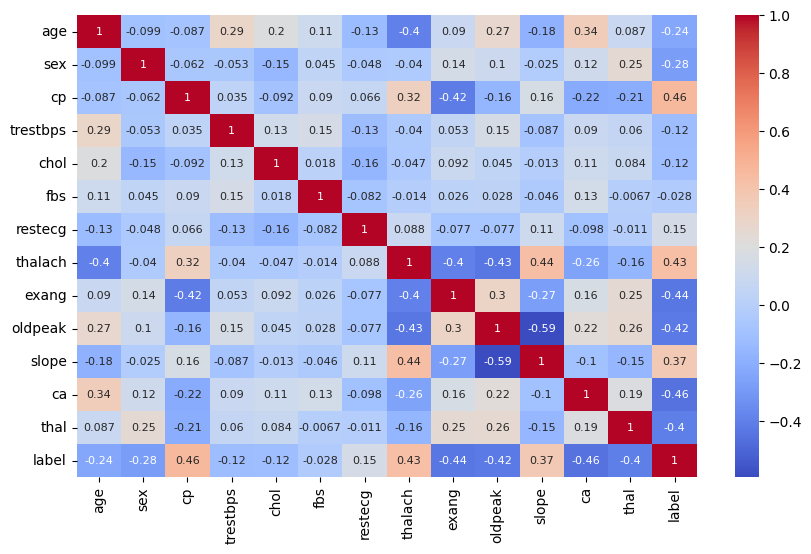

In [ ]:
#Create a correlation heatmap
corr = df.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()

In [ ]:
# Select the numeric columns (X is the feature matrix)
X = df.select_dtypes(include=[np.number])

# Add a constant column for VIF calculation
X['intercept'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

# Display the VIF values
print(vif)

      VIF    Feature
0    1.44        age
1    1.23        sex
2    1.40         cp
3    1.18   trestbps
4    1.15       chol
5    1.09        fbs
6    1.07    restecg
7    1.65    thalach
8    1.44      exang
9    1.74    oldpeak
10   1.66      slope
11   1.29         ca
12   1.19       thal
13   2.07      label
14 213.00  intercept


Não há ocorrência de multicolinearidade

---

<br>

### Etapa 3: Pré-processamento  

#### Separação da variável dependente

In [31]:
X=df.drop('label', axis=1) # X contém todos os atributos menos o label
y=df['label']

#### Divisão da base de dados em treinamento e teste

In [32]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=44)

<br>

#### Feature selection  
##### Definir o valor ideal de k

In [34]:
# Definir o valor ideal de K
for k in range(1, 14):
  reducao_dim = SelectKBest(f_classif, k=k).fit(X_train, y_train)
  X_reduzido = reducao_dim.transform(X_train)
  clf = GaussianNB()
  cv_results = cross_validate(clf, X_reduzido, y_train, cv=5)
  print('Features=',k,' Acc=',np.mean(cv_results['test_score']))

Features= 1  Acc= 0.7149659863945578
Features= 2  Acc= 0.7190476190476189
Features= 3  Acc= 0.7644557823129252
Features= 4  Acc= 0.7644557823129252
Features= 5  Acc= 0.772704081632653
Features= 6  Acc= 0.7849489795918367
Features= 7  Acc= 0.8016156462585033
Features= 8  Acc= 0.8097789115646259
Features= 9  Acc= 0.8137755102040817
Features= 10  Acc= 0.8098639455782314
Features= 11  Acc= 0.8098639455782314
Features= 12  Acc= 0.8099489795918368
Features= 13  Acc= 0.8099489795918368


##### Definir as variáveis a serem utilizadas

In [35]:
k = 9  # You can change this to the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector on the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Apply the transformation on the test data
X_test_selected = selector.transform(X_test)

# To view the selected features

mask = selector.get_support()
selected_features_names = X.columns[mask]
print(f"Selected feature indices: {selected_features_names}")

Selected feature indices: Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')


#### Atributos mais importantes para a modelagem  
* age: &nbsp;idade    
* sex: &nbsp;sexo    
* cp: &nbsp;tipo de dor no peito  
* thalach: &nbsp;máxima frequência cardíaca atingida  
* exang: &nbsp;angina induzida por exercício   
* oldpeak: &nbsp;depressão do segmento ST induzida por exercício em relação ao repouso  
* slope: &nbsp;inclinação do segmento ST no pico do exercício  
* ca: &nbsp;número de vasos principais (0-3) evidenciados por fluoroscopia

#### Criar novo dataframe utilizando apenas as variáveis selecionadas

In [36]:
# Renomeando o dataset ajustado para X_train e X_test
X_train = X_train_selected
X_test = X_test_selected

---

<br>

### Etapa 4: Modelagem

#### Verificação do modelo com maior acurácia sem ajuste de hiperparâmetros

In [25]:
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models_sorted = models.sort_index()

models

 14%|█▍        | 4/29 [00:00<00:01, 13.31it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|█████████▋| 28/29 [00:01<00:00, 19.95it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 132, number of negative: 110


100%|██████████| 29/29 [00:01<00:00, 18.10it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.87,0.87,0.87,0.87,0.03
GaussianNB,0.87,0.87,0.87,0.87,0.02
QuadraticDiscriminantAnalysis,0.87,0.87,0.87,0.87,0.04
LinearSVC,0.85,0.85,0.85,0.85,0.03
LogisticRegression,0.85,0.85,0.85,0.85,0.03
SVC,0.85,0.85,0.85,0.85,0.02
CalibratedClassifierCV,0.85,0.85,0.85,0.85,0.07
RidgeClassifierCV,0.85,0.85,0.85,0.85,0.02
RidgeClassifier,0.85,0.85,0.85,0.85,0.02


---

<br>

#### **Modelo 1: Stochastic Gradient Descent Classifier**

In [50]:
# Criação do pipeline de dados
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(random_state=42))
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_sgd = {
    'clf__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge',
                  'perceptron', 'squared_error', 'huber', 'epsilon_insensitive',
                  'squared_epsilon_insensitive'],
    'clf__alpha': np.logspace(-6, 1, 10),
    'clf__penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'clf__l1_ratio': [0, 0.1, 0.5, 0.9],
    'clf__max_iter': [1000, 2000],
    'clf__tol': [1e-4, 1e-3],
    'clf__learning_rate': ['optimal', 'constant', 'adaptive'],
    'clf__class_weight': [None, 'balanced']
}

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Grid Search
model = GridSearchCV(pipeline_sgd, param_grid=hyperparams_sgd,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

model.fit(X_train, y_train)

print("Melhores parâmetros: ", model.best_params_)
print(f"Melhor acurácia encontrada na base de treinamento: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train.log')

Melhores parâmetros:  {'clf__alpha': 0.007742636826811269, 'clf__class_weight': 'balanced', 'clf__l1_ratio': 0, 'clf__learning_rate': 'optimal', 'clf__loss': 'modified_huber', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__tol': 0.0001}
Melhor acurácia encontrada na base de treinamento: 0.85909864


In [27]:
# Utilização do modelo na base de teste
sgd_clf = model.best_estimator_
sgd_clf.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = sgd_clf.score(X_test, y_test)
print(f'Acurácia do modelo SGD na base de teste: {test_accuracy}')

NameError: name 'model' is not defined

In [29]:
# Salvar o modelo
joblib.dump(sgd_clf, 'Heart_Failure_Prediction_SGDClassifier_model.joblib')

['Heart_Failure_Prediction_SGDClassifier_model.joblib']

---

<br>

#### **Modelo 2: GaussianNB Classifier**

In [53]:
# Criação do pipeline de dados
pipeline_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_gnb = {
    'clf__var_smoothing': np.logspace(-15, -5, num=100)
}

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Grid Search
model = GridSearchCV(pipeline_gnb, param_grid=hyperparams_gnb,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Melhores parâmetros: ", model.best_params_)
print(f"Melhor acurácia encontrada na base de treinamento: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_GNB.log')

Melhores parâmetros:  {'clf__var_smoothing': 1e-15}
Melhor acurácia encontrada na base de treinamento: 0.83869048


In [54]:
# Utilização do modelo na base de teste
clf_gnb = model.best_estimator_
clf_gnb.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_gnb.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8688524590163934


In [55]:
# Salvar o modelo
joblib.dump(clf_gnb, 'Heart_Failure_Prediction_GaussianNB_model.joblib')

['Heart_Failure_Prediction_GaussianNB_model.joblib']

---

<br>

#### Modelo 3: Quadratic Discriminant Analysis (QDA)

In [56]:
# Criação do pipeline de dados
pipeline_qda = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', QuadraticDiscriminantAnalysis())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_qda = {
    'clf__reg_param': np.logspace(-5, 1, 20)
}

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Grid Search
model = GridSearchCV(pipeline_qda, param_grid=hyperparams_qda,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Melhores parâmetros: ", model.best_params_)
print(f"Melhor acurácia encontrada na base de treinamento: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_QDA.log')

Melhores parâmetros:  {'clf__reg_param': 0.26366508987303555}
Melhor acurácia encontrada na base de treinamento: 0.84277211


In [57]:
# Utilização do modelo na base de teste
clf_qda = model.best_estimator_
clf_qda.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_qda.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8688524590163934


In [58]:
# Salvar o modelo
joblib.dump(clf, 'Heart_Failure_Prediction_QDA_model.joblib')

['Heart_Failure_Prediction_QDA_model.joblib']

---

<br>

#### Modelo 4: Linear Support Vector Classifier

In [45]:
# Criação do pipeline de dados
pipeline_lsvc = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LinearSVC())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_lsvc = [{
    'clf__C': np.logspace(-3, 2, 10),
    'clf__penalty': ['l2'],
    'clf__dual': [True, False],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__class_weight': [None, 'balanced'],
    'clf__tol': np.logspace(-5, 0, 10),
    'clf__max_iter': [1000, 5000, 10000]
},
{
    'clf__C': np.logspace(-3, 2, 10),
    'clf__penalty': ['l1'],
    'clf__dual': [False],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__class_weight': [None, 'balanced'],
    'clf__tol': np.logspace(-5, 0, 10),
    'clf__max_iter': [1000, 5000, 10000]
}]

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Random Search
model = RandomizedSearchCV(pipeline_lsvc, param_distributions=hyperparams_lsvc,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Best parameters found: ", model.best_params_)
print(f"Best cross-validated accuracy: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_LSVC.log')

Best parameters found:  {'clf__tol': 3.5938136638046256e-05, 'clf__penalty': 'l2', 'clf__max_iter': 5000, 'clf__loss': 'hinge', 'clf__dual': True, 'clf__class_weight': 'balanced', 'clf__C': 0.01291549665014884}
Best cross-validated accuracy: 0.83452381


In [46]:
# Utilização do modelo na base de teste
clf_lsvc = model.best_estimator_
clf_lsvc.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_lsvc.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8524590163934426


In [48]:
# Salvar o modelo
joblib.dump(clf_lsvc, 'Heart_Failure_Prediction_LSVC_model.joblib')

['Heart_Failure_Prediction_LSVC_model.joblib']

---

<br>

#### Modelo 5: Logistic Regression  

In [50]:
# Criação do pipeline de dados
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_logreg = [{
    'clf__C': np.logspace(-5, 4, 20),
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [100, 200],
    'clf__tol': [1e-4, 1e-3]
},
{
    'clf__C': np.logspace(-5, 4, 20),
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__solver': ['saga', 'newton-cg', 'lbfgs', 'sag'],
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [100, 200],
    'clf__tol': [1e-4, 1e-3]
}]

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Random Search
model = RandomizedSearchCV(pipeline_logreg, param_distributions=hyperparams_logreg,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Best parameters found: ", model.best_params_)
print(f"Best cross-validated accuracy: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_LOGREG.log')

Best parameters found:  {'clf__tol': 0.0001, 'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__max_iter': 100, 'clf__class_weight': 'balanced', 'clf__C': 0.002335721469090121}
Best cross-validated accuracy: 0.83027211


In [51]:
# Utilização do modelo na base de teste
clf_logreg = model.best_estimator_
clf_logreg.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_logreg.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8524590163934426


In [52]:
# Salvar o modelo
joblib.dump(clf_logreg, 'Heart_Failure_Prediction_SVC_model.joblib')

['Heart_Failure_Prediction_SVC_model.joblib']

---

<br>

### Previsão

In [ ]:
# Load the saved model
clf = joblib.load('Heart_Failure_Prediction_GaussianNB_model.joblib')

# Use the loaded model to make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
class_report = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

